**Objective:**

The objective is simple to classify and predict apple quality either it is good or bad. So using the KNN model, it can be classified and predict. In order to measure performance of the model we will take help of accuracy score, classification report and confusion matrix.

**Import Libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

**Data statistics**

In [ ]:
data = pd.read_csv(r"/content/apple_quality.csv")

In [ ]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
data.drop('A_id', axis = 1, inplace = True)

In [ ]:
data.info() # so there is nul value here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [ ]:
data = data.dropna(axis = 0)#axis=0 means delete rows

In [ ]:
data.iloc[:, -1 :].value_counts() # counts of good and bad

Quality
good       2004
bad        1996
Name: count, dtype: int64

In [ ]:
def catagorical(item):
    if item == 'good':
        return 1.0
    else:
        return 0.0

In [ ]:
data['Quality'] = data['Quality'].apply(lambda x: catagorical(x))

In [ ]:
data['Quality'].value_counts()

Quality
1.0    2004
0.0    1996
Name: count, dtype: int64

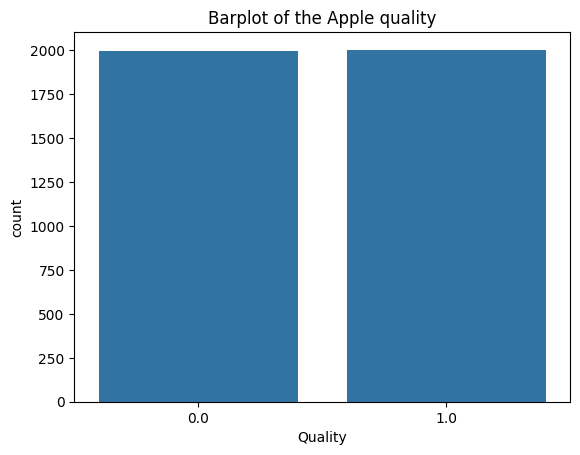

In [ ]:
sns.countplot(x = 'Quality', data = data)
plt.title('Barplot of the Apple quality')
plt.show()

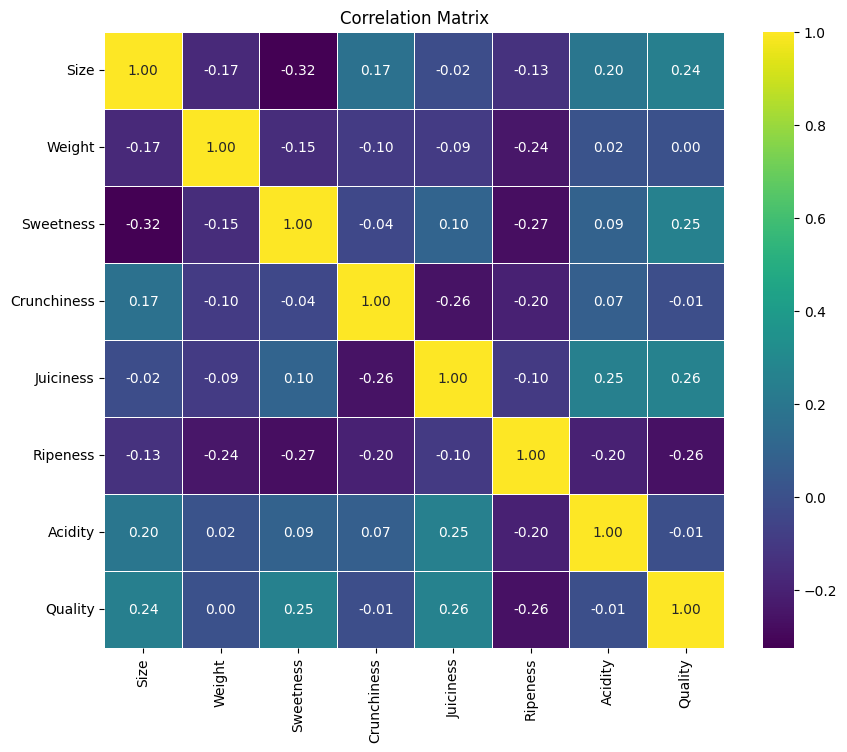

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt = '0.2f', cmap = 'viridis', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

**Training datasets**

In [ ]:
X = data.iloc[:, : -1]
y = data.iloc[:, -1 :]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Classification Report function
def class_report(yt, yp):
    return pd.DataFrame(classification_report(yt, yp, output_dict = True)).transpose()

In [ ]:
# Confusion Matrix function
def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)

    plt.figure(figsize = (4,4))
    sns.heatmap(cm, cmap = 'viridis', fmt = '0.2f', annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Apple Quality Classification')
    plt.show()

**KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # for finding result of training data sets

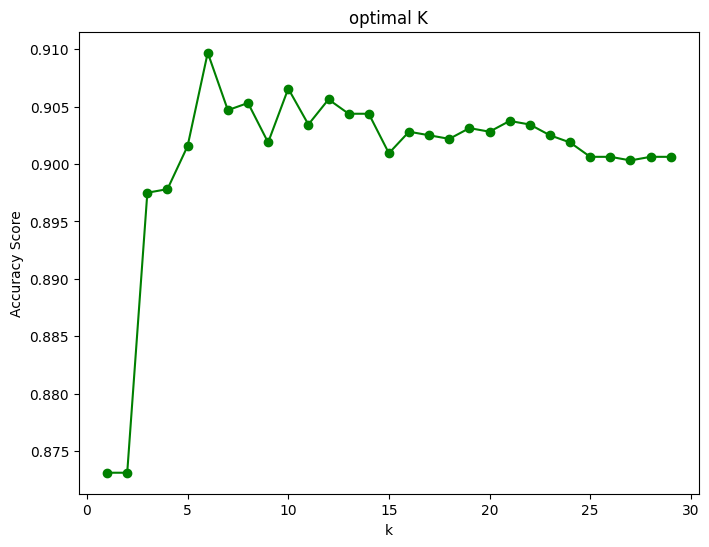

In [ ]:
k_values = [i for i in range(1, 30)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    score = cross_val_score(knn, X_train, y_train.values.ravel(), cv = 5)
    scores.append(np.mean(score))

plt.figure(figsize = (8,6))
plt.plot(k_values, scores, c = 'green', marker = 'o')
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('optimal K')
plt.show()

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print(f"So an optimal k is {best_k}") # k value is 6 value however we will use odd number say 7.
# because KNN only works efficiently and effictivelly with k being odd number
#so k >= 1 (true only for all odd numbers)

So an optimal k is 6


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=6, weights='distance')

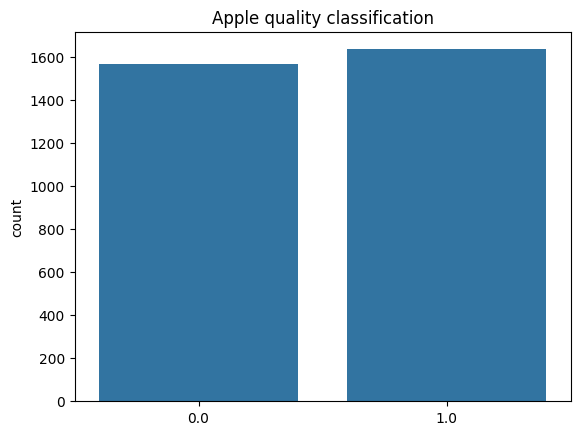

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_prob = cross_val_predict(knn, X_train, y_train.values.ravel())
sns.countplot(x = y_train_prob)
plt.title('Apple quality classification')
plt.show()

In [ ]:
class_report(y_train, y_train_prob) # classification report

,precision,recall,f1-score,support
0.0,0.917625,0.899812,0.908631,1597.000000
1.0,0.902081,0.919526,0.910720,1603.000000
accuracy,0.909687,0.909687,0.909687,0.909687
macro avg,0.909853,0.909669,0.909675,3200.000000
weighted avg,0.909838,0.909687,0.909677,3200.000000


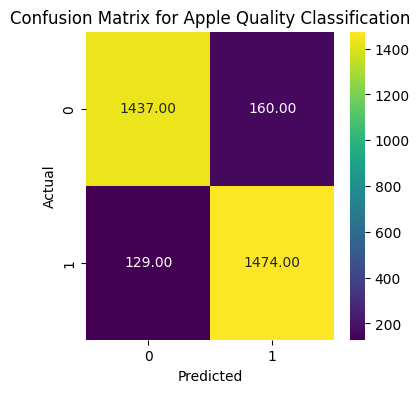

In [ ]:
conf_matrix(y_train, y_train_prob)

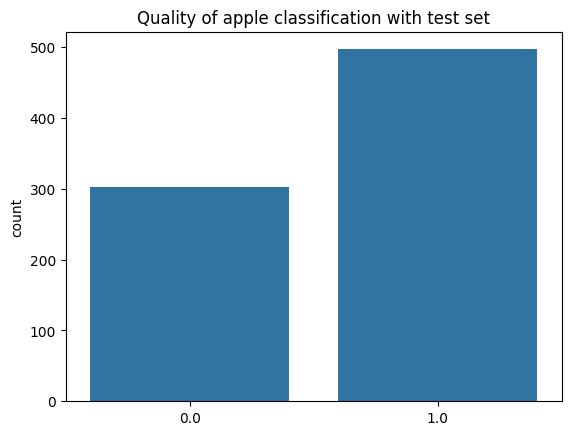

In [ ]:
# above model looks fit model
# Now we will use X_test set for model

y_prob = knn.predict(X_test)
sns.countplot(x = y_prob)
plt.title('Quality of apple classification with test set')
plt.show()

In [ ]:
class_report(y_test, y_prob)


,precision,recall,f1-score,support
0.0,0.900990,0.684211,0.777778,399.000
1.0,0.746479,0.925187,0.826281,401.000
accuracy,0.805000,0.805000,0.805000,0.805
macro avg,0.823734,0.804699,0.802029,800.000
weighted avg,0.823541,0.805000,0.802090,800.000


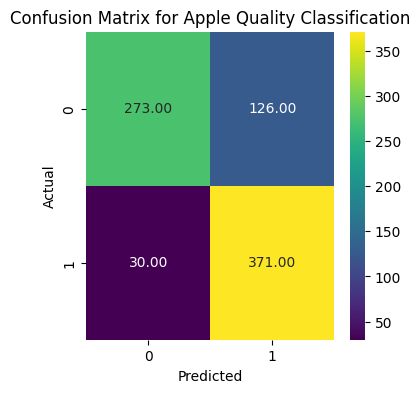

In [ ]:
conf_matrix(y_test, y_prob)

In conclusion, it is seen that KNN model is working average as per classification report and confusion matrix. So it is advised

either remove outlier and do features scaling
or use other model that might be good fit such as XGBOOST or SVM model.